In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import shapiro
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf

In [106]:
measurements = pd.read_csv("measurements.csv")

In [107]:
measurements.head(1)

,ID,group,sex,birth_year,chol_init,chol_final,trig_init,trig_final,weight_init,weight_final,...,hip_perimeter_diff,BMI_init,BMI_final,BMI_diff,tricipital_fold_final,tricipital_fold_init,abdominal_fold_final,abdominal_fold_init,subscapular_fold_final,subscapular_fold_init
0,t1,Test,f,2010.0,183.0,177.0,74.0,68.0,69.5,69.0,...,-1,27.84009,25.039919,-2.800171,23.0,19.0,19.0,19.0,10.0,10.0


## Correlation tests, such as Pearson correlation coefficient or Spearman's rank correlation coefficient, rely on several assumptions for their validity. These assumptions include:

1) Independence: The observations in the dataset should be independent of each other. This means that the value of one variable should not be dependent on the value of another variable in the dataset.

2) Linearity: The relationship between the variables should be linear. This means that when you plot the relationship between the two variables, it should roughly follow a straight line.

3) Homoscedasticity: Also known as homogeneity of variance, this assumption states that the variance of the residuals (the differences between observed and predicted values) should be constant across all levels of the predictor variable.

4) Normality: For Pearson correlation, it is assumed that the variables are normally distributed. However, for large sample sizes, violation of normality assumption may not be critical due to the central limit theorem.

5) Continuous variables: The variables being correlated should be continuous. Correlation tests are not suitable for categorical variables unless they are appropriately recoded or transformed.

6) Outliers: Correlation tests are sensitive to outliers. Extreme values in the dataset can disproportionately influence the results of the correlation analysis.

7) Relationship type: The correlation coefficient measures the strength and direction of the linear relationship between two variables. It assumes a monotonic relationship, meaning that as one variable increases, the other variable either consistently increases or consistently decreases.

## Regression analysis relies on several assumptions for its validity. These assumptions include:

1) Linearity: There should be a linear relationship between the independent variables (predictors) and the dependent variable (outcome). This means that changes in the independent variables should result in proportional changes in the dependent variable.

2) Independence of residuals: The residuals (the differences between observed and predicted values) should be independent of each other. This assumption is similar to the independence assumption in correlation tests.

3) Homoscedasticity: Also known as homogeneity of variance, this assumption states that the variance of the residuals should be constant across all levels of the predictors. In other words, the spread of residuals should remain consistent throughout the range of the predictors.

4) Normality of residuals: The residuals should be normally distributed. This assumption is necessary for the validity of hypothesis tests and confidence intervals based on the regression coefficients. However, violation of normality assumption may not be critical for large sample sizes due to the central limit theorem.

5) No perfect multicollinearity: There should not be perfect linear relationships among the independent variables. This means that one independent variable should not be a perfect linear combination of the others. High multicollinearity can inflate standard errors and lead to unstable estimates.

6) No influential outliers: Outliers or influential data points should not excessively influence the regression results. Outliers can distort parameter estimates and affect the overall fit of the model.

7) No autocorrelation: For time-series data or other forms of data with a temporal component, the residuals should not be correlated with each other across time. Autocorrelation violates the assumption of independence of residuals.

8) Measurement of variables: The variables should be measured accurately and with minimal error. Measurement error can bias parameter estimates and affect the interpretation of the results.

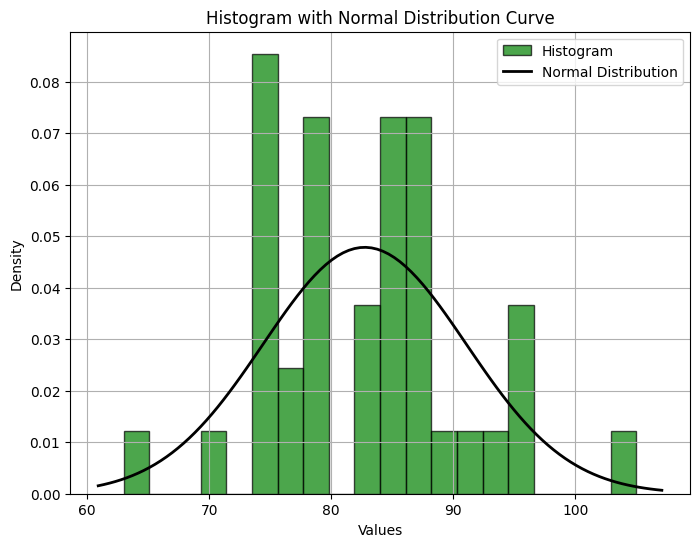

In [108]:
# Plot histogram
column_data = measurements.trig_init[:39]

plt.figure(figsize=(8, 6))
plt.hist(column_data, bins=20, density=True, color='green', edgecolor='black', alpha=0.7, label='Histogram')

# Plot normal distribution curve
mu, sigma = stats.norm.fit(column_data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.title('Histogram with Normal Distribution Curve')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [131]:
shapiro(measurements.trig_init[:39])

ShapiroResult(statistic=0.9725894637526419, pvalue=0.4492463486275304)

# Shapiro-Wilk test
The Shapiro-Wilk test tests the null hypothesis H0 that the data is normally distributed.
If p < 0.05, H0 is rejected, hence the data is not normally distributed

In [110]:
data_columns = measurements.columns[4:]
data_columns

Index(['chol_init', 'chol_final', 'trig_init', 'trig_final', 'weight_init',
       'weight_final', 'weight_diff', 'height_init', 'height_final',
       'height_diff', 'armspan_init', 'armspan_final', 'armspan_diff',
       'arm_perimeter_init', 'arm_periemter_final', 'arm_perimeter_diff',
       'thorax_perimeter_init', 'thorax_perimeter_final',
       'thorax_perimeter_diff', 'abdominal_perimeter_init',
       'abdominal_perimeter_final', 'abdominal_perimeter_diff',
       'hip_perimeter_init', 'hip_perimeter_final', 'hip_perimeter_diff',
       'BMI_init', 'BMI_final', 'BMI_diff', 'tricipital_fold_final',
       'tricipital_fold_init', 'abdominal_fold_final', 'abdominal_fold_init',
       'subscapular_fold_final', 'subscapular_fold_init'],
      dtype='object')

In [111]:
tests_results = pd.DataFrame(index = data_columns, columns = ["shapiro_statistic", "shapiro_pvalue"])

In [112]:
for column in data_columns:
    tests_results.loc[column] = shapiro(measurements.loc[:38,column])

In [113]:
tests_results["normality"] = 0

In [114]:
tests_results.loc[tests_results["shapiro_pvalue"] >= 0.05, "normality"] = 1

In [115]:
tests_results.head(5)

,shapiro_statistic,shapiro_pvalue,normality
chol_init,0.908151,0.003811,0
chol_final,0.94302,0.047939,0
trig_init,0.972589,0.449246,1
trig_final,0.946664,0.063468,1
weight_init,0.970721,0.395062,1


In [116]:
normal_columns = tests_results.loc[tests_results["normality"] == 1].index
normal_columns

Index(['trig_init', 'trig_final', 'weight_init', 'weight_diff', 'height_init',
       'height_final', 'height_diff', 'armspan_init', 'armspan_final',
       'arm_perimeter_init', 'arm_periemter_final', 'thorax_perimeter_init',
       'thorax_perimeter_final', 'abdominal_perimeter_init',
       'abdominal_perimeter_final', 'hip_perimeter_init',
       'hip_perimeter_final', 'BMI_init', 'BMI_final', 'BMI_diff',
       'tricipital_fold_final'],
      dtype='object')

In [117]:
# according to the documentation https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html
# the first element of the output is the test statistic, and the second one is the p-value

# The H0 (null hypothesis) of the test is that the series is NOT stationary
# if the p-value is less than 0.05, that means we reject the null hypothesis
# which means that our data IS stationary

In [118]:
adfuller(measurements.trig_init[:39])[1]

1.77988327473002e-05

In [120]:
tests_results["stationarity_test_pvalue"]=0
tests_results["stationarity"]=0

In [121]:
for column in data_columns:
    tests_results.loc[column, "stationarity_test_pvalue"] = adfuller(measurements.loc[:38,column])[1]

C:\Users\THW\AppData\Local\Temp\ipykernel_5684\3407012198.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.741225060829267e-05' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tests_results.loc[column, "stationarity_test_pvalue"] = adfuller(measurements.loc[:38,column])[1]


In [123]:
tests_results.head(7)

,shapiro_statistic,shapiro_pvalue,normality,stationarity_test_pvalue,stationarity
chol_init,0.908151,0.003811,0,8.741225e-05,0
chol_final,0.94302,0.047939,0,2.791973e-06,0
trig_init,0.972589,0.449246,1,1.779883e-05,0
trig_final,0.946664,0.063468,1,2.266163e-07,0
weight_init,0.970721,0.395062,1,2.656420e-06,0
weight_final,0.940197,0.038632,0,5.329525e-07,0
weight_diff,0.989289,0.967623,1,1.426440e-11,0


In [126]:
tests_results.loc[tests_results["stationarity_test_pvalue"] <= 0.05, "stationarity"] = 1

In [128]:
tests_results

,shapiro_statistic,shapiro_pvalue,normality,stationarity_test_pvalue,stationarity
chol_init,0.908151,0.003811,0,8.741225e-05,1
chol_final,0.94302,0.047939,0,2.791973e-06,1
trig_init,0.972589,0.449246,1,1.779883e-05,1
trig_final,0.946664,0.063468,1,2.266163e-07,1
weight_init,0.970721,0.395062,1,2.656420e-06,1
weight_final,0.940197,0.038632,0,5.329525e-07,1
weight_diff,0.989289,0.967623,1,1.426440e-11,1
height_init,0.981182,0.746234,1,1.122703e-05,1
height_final,0.969987,0.375174,1,2.003439e-07,1
height_diff,0.963814,0.238483,1,2.776928e-10,1


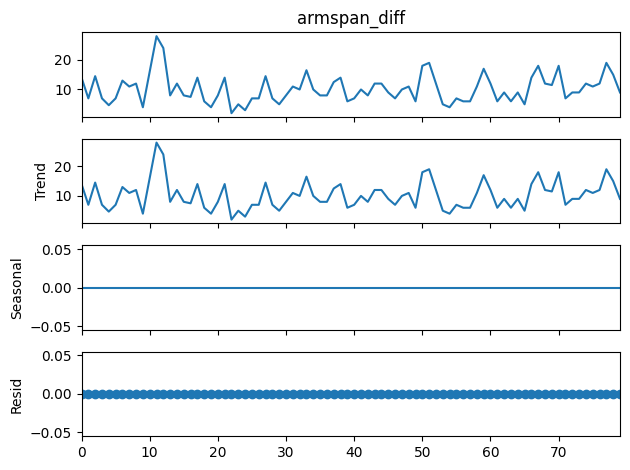

In [130]:
result = seasonal_decompose(measurements['armspan_diff'], model='additive', period=1)
result.plot()
plt.show()

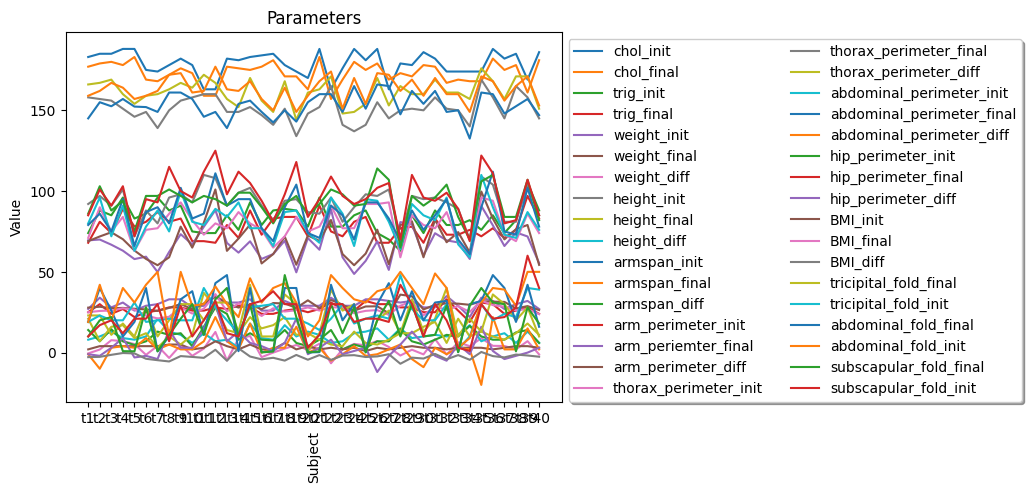

In [162]:
#Plot parameters
for column in data_columns:
    plt.plot(measurements['ID'][:40], measurements[column][:40], label=column)
    
"""
# Plotting using Matplotlib
plt.plot(x_axis, var1_y_axis, label='var1')
plt.plot(x_axis, var2_y_axis, label='var2')
"""

plt.xlabel('Subject', rotation = 90)
plt.ylabel('Value')
plt.title('Parameters')
plt.legend(bbox_to_anchor=(1, 1), ncol=2, shadow=True)
plt.show()

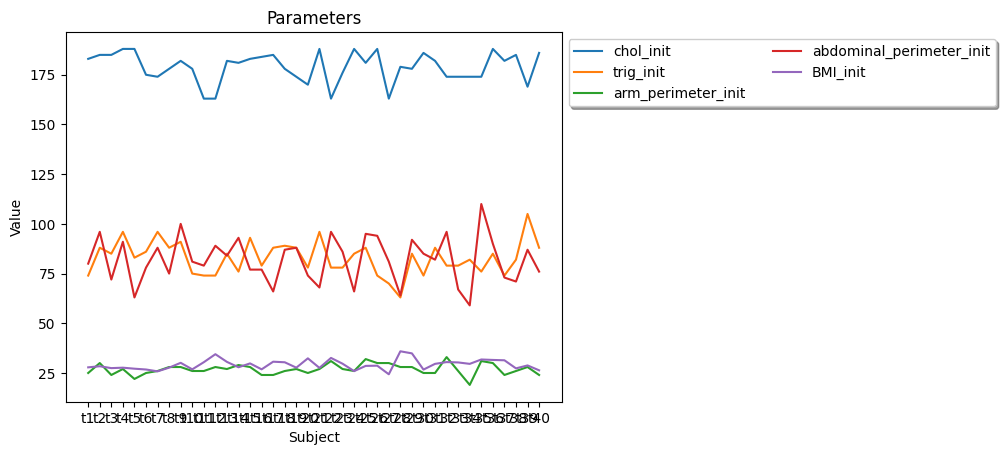

In [198]:
#Plot parameters

for column in data_columns[[0,2,13,19,25]]:
    plt.plot(measurements['ID'][:40], measurements[column][:40], label=column)

plt.xlabel('Subject')
plt.ylabel('Value')
plt.title('Parameters')
plt.legend(bbox_to_anchor=(1, 1), ncol=2, shadow=True)
plt.show()

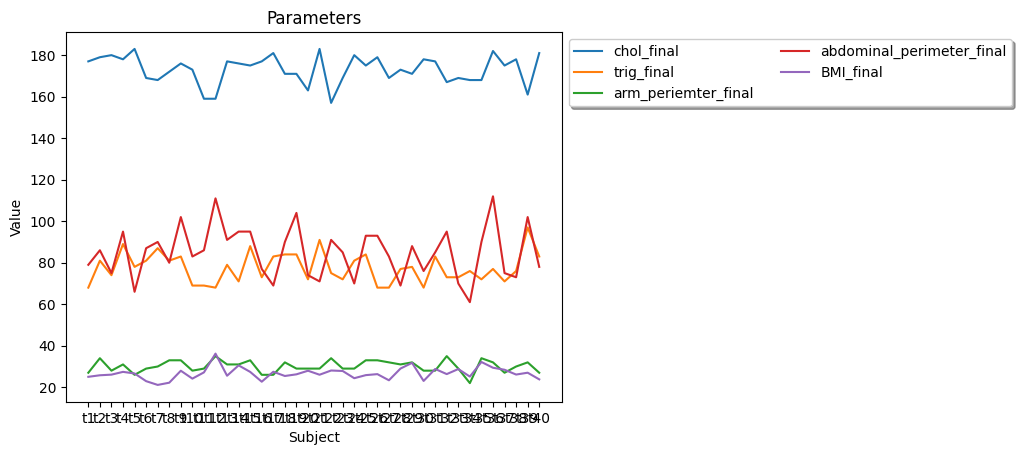

In [199]:
#Plot parameters

for column in data_columns[[1,3,14,20,26]]:
    plt.plot(measurements['ID'][:40], measurements[column][:40], label=column)

plt.xlabel('Subject')
plt.ylabel('Value')
plt.title('Parameters')
plt.legend(bbox_to_anchor=(1, 1), ncol=2, shadow=True)
plt.show()

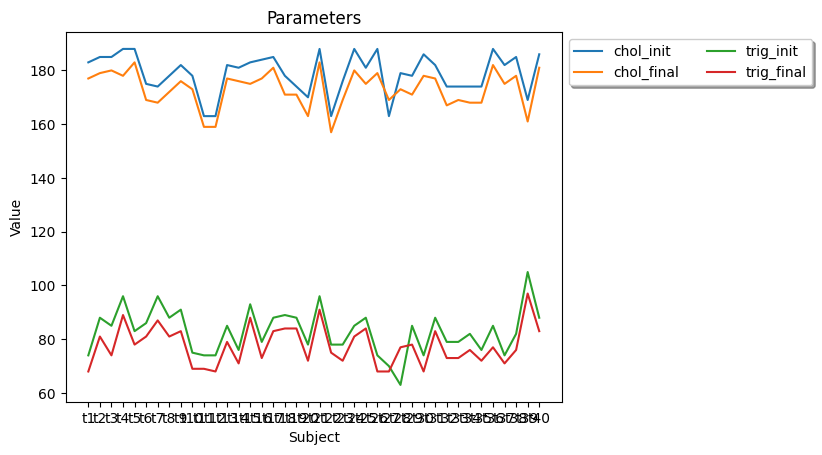

In [163]:
#Plot parameters

for column in data_columns[:4]:
    plt.plot(measurements['ID'][:40], measurements[column][:40], label=column)

plt.xlabel('Subject')
plt.ylabel('Value')
plt.title('Parameters')
plt.legend(bbox_to_anchor=(1, 1), ncol=2, shadow=True)
plt.show()

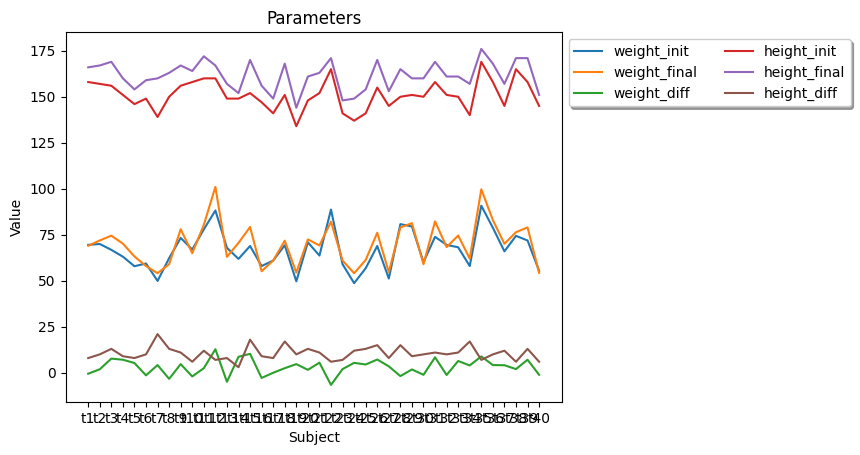

In [177]:
#Plot parameters

for column in data_columns[4:10]:
    plt.plot(measurements['ID'][:40], measurements[column][:40], label=column)

plt.xlabel('Subject')
plt.ylabel('Value')
plt.title('Parameters')
plt.legend(bbox_to_anchor=(1, 1), ncol=2, shadow=True)
plt.show()

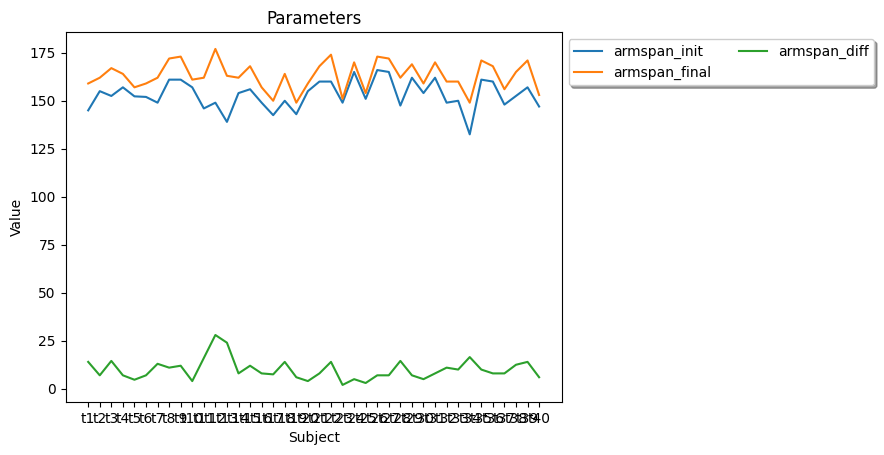

In [192]:
#Plot parameters

for column in data_columns[10:13]:
    plt.plot(measurements['ID'][:40], measurements[column][:40], label=column)

plt.xlabel('Subject')
plt.ylabel('Value')
plt.title('Parameters')
plt.legend(bbox_to_anchor=(1, 1), ncol=2, shadow=True)
plt.show()

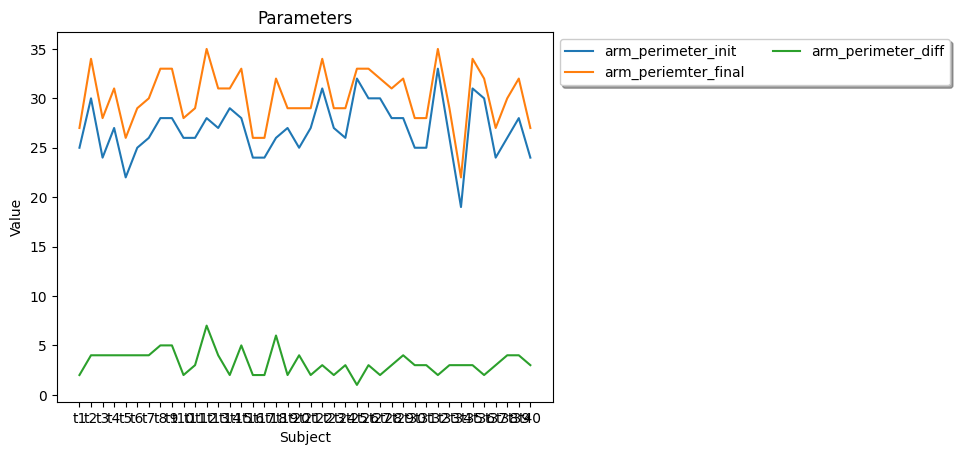

In [165]:
#Plot parameters

for column in data_columns[13:16]:
    plt.plot(measurements['ID'][:40], measurements[column][:40], label=column)

plt.xlabel('Subject')
plt.ylabel('Value')
plt.title('Parameters')
plt.legend(bbox_to_anchor=(1, 1), ncol=2, shadow=True)
plt.show()

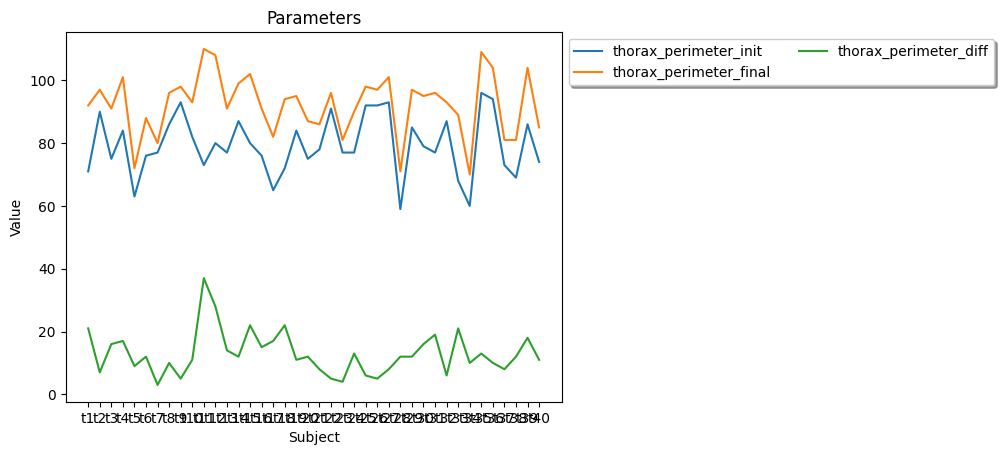

In [191]:
#Plot parameters

for column in data_columns[16:19]:
    plt.plot(measurements['ID'][:40], measurements[column][:40], label=column)

plt.xlabel('Subject')
plt.ylabel('Value')
plt.title('Parameters')
plt.legend(bbox_to_anchor=(1, 1), ncol=2, shadow=True)
plt.show()

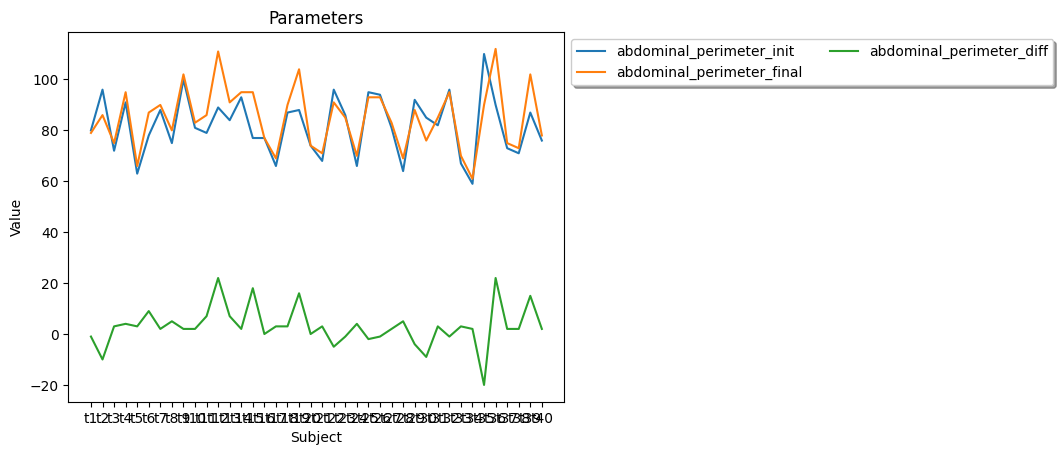

In [179]:
#Plot parameters

for column in data_columns[19:22]:
    plt.plot(measurements['ID'][:40], measurements[column][:40], label=column)

plt.xlabel('Subject')
plt.ylabel('Value')
plt.title('Parameters')
plt.legend(bbox_to_anchor=(1, 1), ncol=2, shadow=True)
plt.show()

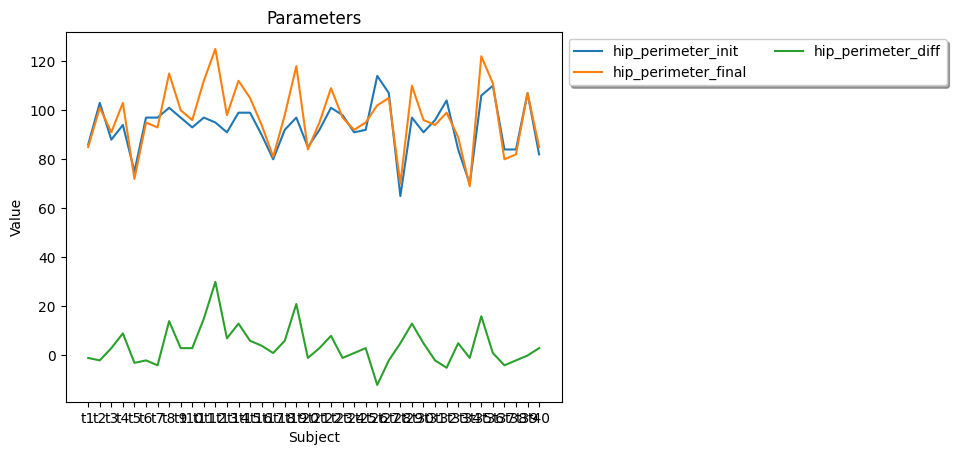

In [180]:
#Plot parameters

for column in data_columns[22:25]:
    plt.plot(measurements['ID'][:40], measurements[column][:40], label=column)

plt.xlabel('Subject')
plt.ylabel('Value')
plt.title('Parameters')
plt.legend(bbox_to_anchor=(1, 1), ncol=2, shadow=True)
plt.show()

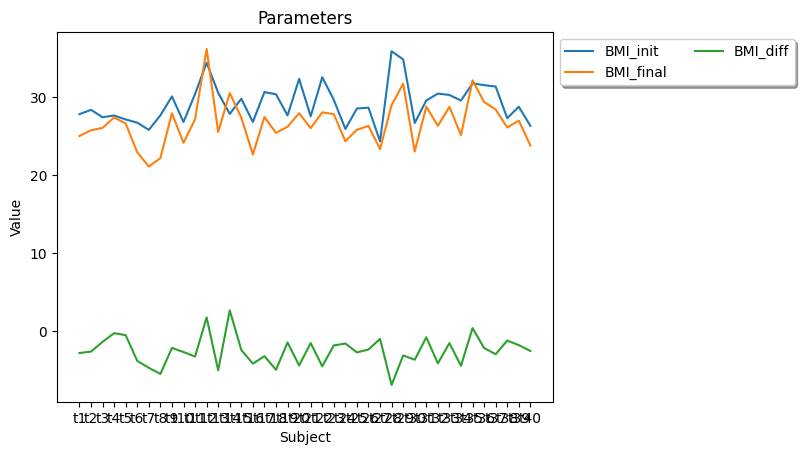

In [181]:
#Plot parameters

for column in data_columns[25:28]:
    plt.plot(measurements['ID'][:40], measurements[column][:40], label=column)

plt.xlabel('Subject')
plt.ylabel('Value')
plt.title('Parameters')
plt.legend(bbox_to_anchor=(1, 1), ncol=2, shadow=True)
plt.show()

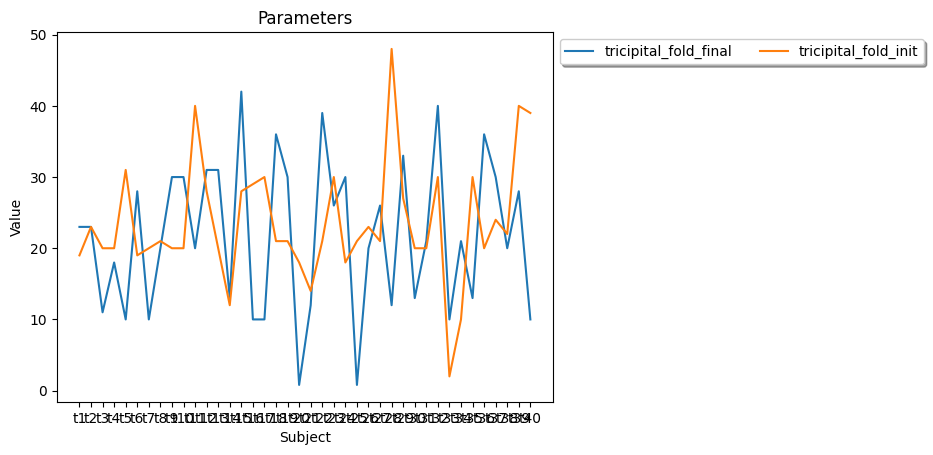

In [187]:
#Plot parameters

for column in data_columns[28:30]:
    plt.plot(measurements['ID'][:40], measurements[column][:40], label=column)

plt.xlabel('Subject')
plt.ylabel('Value')
plt.title('Parameters')
plt.legend(bbox_to_anchor=(1, 1), ncol=2, shadow=True)
plt.show()

In [144]:
normal_and_stationary_columns = tests_results.loc[(tests_results["normality"] == 1) & (tests_results["stationarity"] == 1)].index

In [145]:
normal_and_stationary_columns

Index(['trig_init', 'trig_final', 'weight_init', 'weight_diff', 'height_init',
       'height_final', 'height_diff', 'armspan_init', 'armspan_final',
       'arm_periemter_final', 'thorax_perimeter_init',
       'thorax_perimeter_final', 'abdominal_perimeter_init',
       'abdominal_perimeter_final', 'hip_perimeter_init',
       'hip_perimeter_final', 'BMI_init', 'BMI_final', 'BMI_diff',
       'tricipital_fold_final'],
      dtype='object')

<Figure size 20000x20000 with 0 Axes>

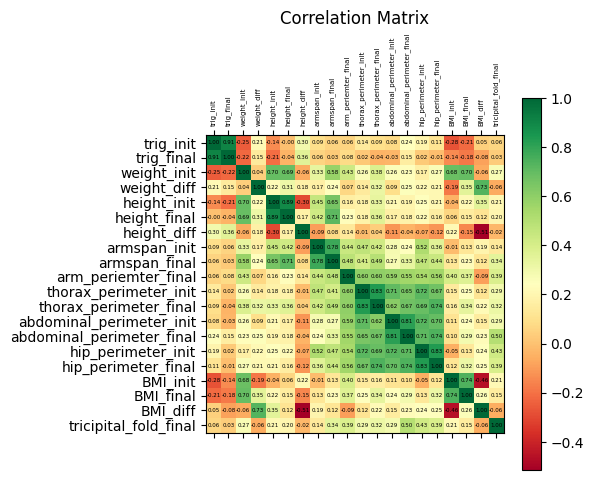

In [195]:
correlation_matrix = measurements[normal_and_stationary_columns].corr()

# Plot correlation matrix
plt.figure(figsize=(200, 200))
plt.matshow(correlation_matrix, cmap='RdYlGn')
plt.title('Correlation Matrix')

# Add color bar
plt.colorbar()

# Add labels to x and y axes
plt.xticks(np.arange(len(normal_and_stationary_columns)), normal_and_stationary_columns, rotation=90, fontsize = 5)
plt.yticks(np.arange(len(normal_and_stationary_columns)), normal_and_stationary_columns)

for i in range(len(normal_and_stationary_columns)):
    for j in range(len(normal_and_stationary_columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black', fontsize = 4)
plt.savefig('correlation_matrix_obesity_small.png')
plt.show()

<Figure size 1e+06x1e+06 with 0 Axes>

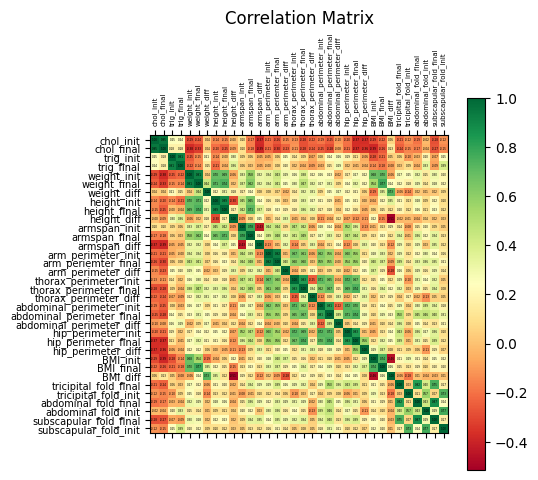

In [196]:
correlation_matrix = measurements[data_columns].corr()

# Plot correlation matrix
plt.figure(figsize=(10000, 10000))
plt.matshow(correlation_matrix, cmap='RdYlGn')
plt.title('Correlation Matrix')

# Add color bar
plt.colorbar()

# Add labels to x and y axes
plt.xticks(np.arange(len(data_columns)), data_columns, rotation=90, fontsize = 5)
plt.yticks(np.arange(len(data_columns)), data_columns, fontsize = 7)

for i in range(len(data_columns)):
    for j in range(len(data_columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black', fontsize = 2)
plt.savefig('correlation_matrix_obesity_all.png')
plt.show()

In [170]:
pearsonr(measurements['armspan_final'], measurements['height_final'])

PearsonRResult(statistic=0.7139329996907602, pvalue=1.0562537557296344e-13)

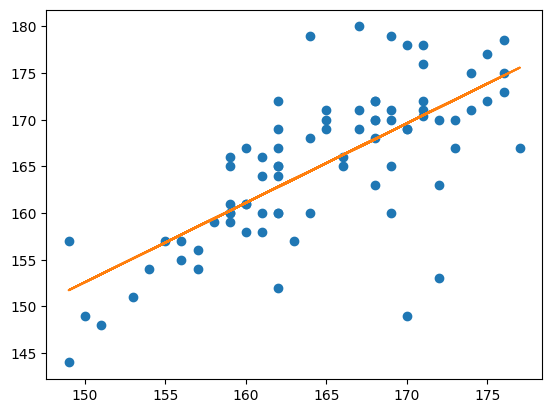

In [171]:
# code from: https://www.statology.org/scatterplot-with-regression-line-python/
m, b = np.polyfit(measurements['armspan_final'], measurements['height_final'], 1)

# add linear regression line to scatterplot 
plt.plot(measurements['armspan_final'], measurements['height_final'], 'o')
plt.plot(measurements['armspan_final'], m*measurements['armspan_final']+b)

In [174]:
mod = smf.ols('armspan_final ~ height_final', data=measurements.loc[:39,["armspan_final", "height_final"]])
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          armspan_final   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     27.00
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           7.18e-06
Time:                        16:39:09   Log-Likelihood:                -125.58
No. Observations:                  40   AIC:                             255.2
Df Residuals:                      38   BIC:                             258.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       64.0286     19.078      3.356   

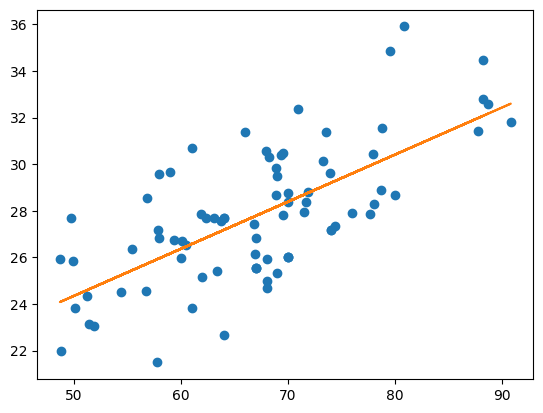

In [176]:
# code from: https://www.statology.org/scatterplot-with-regression-line-python/
m, b = np.polyfit(measurements['weight_init'], measurements['BMI_init'], 1)

# add linear regression line to scatterplot 
plt.plot(measurements['weight_init'], measurements['BMI_init'], 'o')
plt.plot(measurements['weight_init'], m*measurements['weight_init']+b)

In [175]:
mod = smf.ols('weight_init ~ BMI_init', data=measurements.loc[:39,["weight_init", "BMI_init"]])
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            weight_init   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     54.15
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           8.08e-09
Time:                        16:41:57   Log-Likelihood:                -132.35
No. Observations:                  40   AIC:                             268.7
Df Residuals:                      38   BIC:                             272.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.1159     12.419     -1.942      0.0